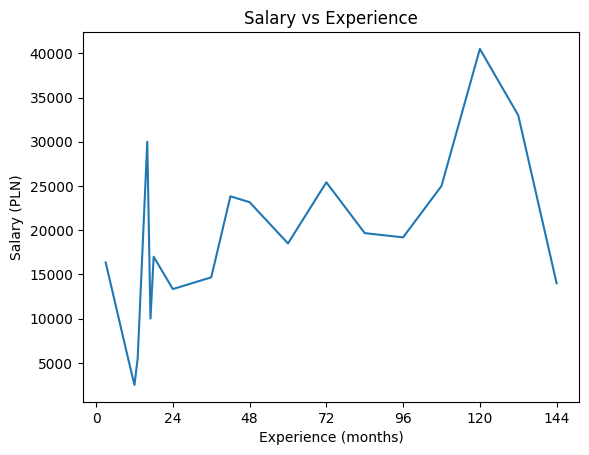

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read data

df = pd.read_csv('../clean-data.csv')

# clean data

df.dropna(inplace=True)
for index, row in df.iterrows():
    if 'm' in row['exp']:
        if ',' in row['exp']:
            row['exp'] = row['exp'].replace(',','.')

        df.at[index, 'exp'] = float(row['exp'].replace('m', ''))
    else:
        if ',' in row['exp']:
            row['exp'] = row['exp'].replace(',','.')
        df.at[index, 'exp'] = float(row['exp']) * 12

df.dropna(inplace=True)

# make a copy

df1 = df.copy()

# filter posts from 2022 and after

df1 = df.loc[df['period'] == 'monthly']
df1= df1.loc[df1['date'] > '2022']

# filter outliers

mean = np.mean(df1['salary'])
std = np.std(df1['salary'])
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

df1 = df1[(df1['salary'] > lower_bound) & (df1['salary'] < upper_bound)]

# group data

grouped_data = df1.groupby('exp')['salary'].mean()

# Salary vs Experience plot

xticks = list(range(0,360,24))

plt.xticks(xticks)
plt.plot(grouped_data.index, grouped_data.values)

plt.title('Salary vs Experience')
plt.xlabel('Experience (months)')
plt.ylabel('Salary (PLN)')

plt.show()

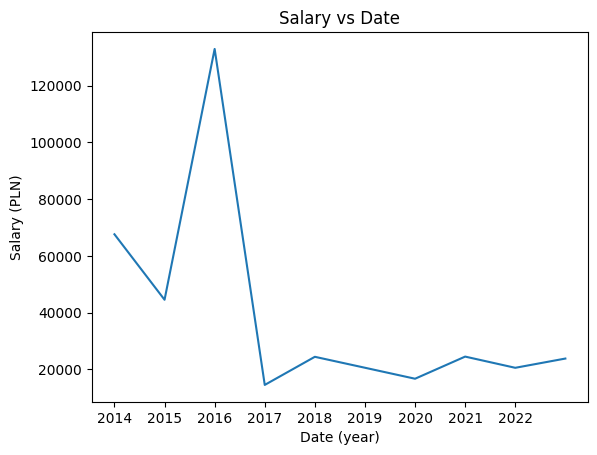

In [68]:

# make a copy

df2 = df.copy()

df2 = df.loc[df['period'] == 'monthly'].copy()

df2['date'] = pd.to_datetime(df2['date'])
yearly_means = df2.groupby(df2['date'].dt.year)['salary'].mean()

# yearly mean plot

xticks = list(range(2014, 2023, 1))

plt.xticks(xticks)
plt.plot(yearly_mean.index, yearly_mean.values)

plt.title('Salary vs Date')
plt.xlabel('Date (year)')
plt.ylabel('Salary (PLN)')

plt.show()